# 저역통과필터 (Low Pass Filter)
- 출처 : https://pinkwink.kr/742

In [3]:
import matplotlib.pyplot as plt
import numpy as np 

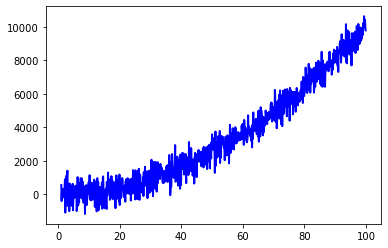

In [4]:
mu, sigma = 0, 500

x = np.arange(1, 100, 0.1)  # x axis
z = np.random.normal(mu, sigma, len(x))  # noise
y = x ** 2 + z # data
plt.plot(x, y, linewidth=2, linestyle="-", c="b")

In [13]:
print(y[0])

551.641359290268


In [20]:
ts = 0.0001
tau = 0.1

tmpResult = []
tmpResult.append(y[0])
for i in np.arange(1,len(x)):
    tmpResult.append( (tau * tmpResult[i-1] + ts * y[i] ) / (ts + tau))
    #print(tmpResult[i])

550.6862629979004
550.2621961358583
549.7928525361743
549.5738621369144
549.2205831094842
548.8232281375356
548.1309885683602
547.6951565572517
546.9533299310721
546.5674128150168
546.4894315385468
546.8420560473411
545.2065764757753
544.3723151001168
543.4463264413193
542.850427279094
543.4222166219795
543.1802072964181
543.8260882387469
544.691986860213
543.4632175246808
542.72516034755
542.0443961706733
541.8259577345792
541.1517832603647
539.6092634952606
539.7176961947978
539.0469438952252
538.5791540408222
537.9679805249459
537.0121848064496
535.8115894802726
535.7647877100964
535.3215926330497
534.1190077286658
533.8228454796011
533.9148269553041
532.4332176216996
531.547386465678
531.3985670381616
531.268098611856
530.5531305857004
529.8216312847527
529.6305725476344
529.3865108178114
529.3726901176834
529.2379441800385
529.0308994969917
528.9826287955465
527.4600366335385
526.1768938059254
525.1244512351241
525.6265591469436
525.072802799906
523.8912618921008
524.0941001153114

In [21]:
y_ = tmpResult

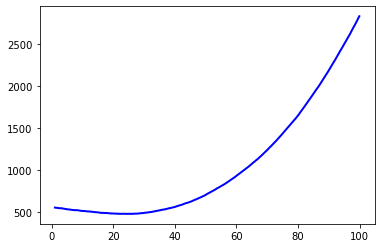

In [22]:
plt.plot(x, y_, linewidth=2, linestyle="-", c="b")

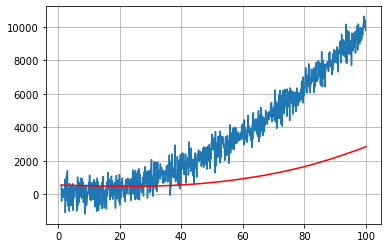

In [23]:
plt.plot(x,y,x,y_,'r')
plt.grid(True)
plt.show()